In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf 
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))

In [3]:
datax_reshape = datax.reshape([datax.shape[0], datax.shape[1]*datax.shape[2]])
datax_reshape_norm = datax_reshape/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_reshape_norm), np.min(datax_reshape_norm)))

최대 : 1.0, 최소 : 0.0


In [4]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_reshape_norm, datay_onehot, test_size = 0.3, random_state = 111)

In [6]:
input_shape = (datax_reshape_norm.shape[1],)

visible = layers.Input(shape = input_shape)
hidden1 = layers.Dense(784, activation='relu')(visible)
hidden2 = layers.Dense(800, activation='relu')(hidden1)
hidden3 = layers.Dense(800, activation='relu')(hidden2)
hidden4 = layers.Dense(800, activation='relu')(hidden3)
hidden5 = layers.Dense(500, activation='relu')(hidden4)
output = layers.Dense(10, activation='softmax')(hidden5)

mlp_function = models.Model(visible, output)

mlp_function.summary()

2022-05-04 11:29:52.514915: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-04 11:29:52.578619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 11:29:52.578765: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 computeCapability: 8.6
coreClock: 1.845GHz coreCount: 20 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 208.65GiB/s
2022-05-04 11:29:52.578948: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-04 11:29:52.580132: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-04 11:29:52.581164: I tensorflow/stream_executor/pla

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_3 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5010  

In [7]:
mlp_function.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = mlp_function.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 10)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10


2022-05-04 11:35:36.145661: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


42000/42000 [==============================] - 115s 3ms/sample - loss: 0.5033 - accuracy: 0.8933 - val_loss: 0.3420 - val_accuracy: 0.9342
Epoch 2/10
42000/42000 [==============================] - 12s 288us/sample - loss: 0.4198 - accuracy: 0.9335 - val_loss: 0.4220 - val_accuracy: 0.9322
Epoch 3/10
42000/42000 [==============================] - 14s 332us/sample - loss: 0.4999 - accuracy: 0.9338 - val_loss: 0.4456 - val_accuracy: 0.9030
Epoch 4/10
42000/42000 [==============================] - 15s 346us/sample - loss: 0.5620 - accuracy: 0.9230 - val_loss: 0.9688 - val_accuracy: 0.9337
Epoch 5/10
42000/42000 [==============================] - 12s 295us/sample - loss: 0.6764 - accuracy: 0.8969 - val_loss: 2.0974 - val_accuracy: 0.8999
Epoch 6/10
42000/42000 [==============================] - 13s 298us/sample - loss: 0.9632 - accuracy: 0.8473 - val_loss: 1.0447 - val_accuracy: 0.8068
Epoch 7/10
42000/42000 [==============================] - 13s 304us/sample - loss: 1.3411 - accuracy: 0.79

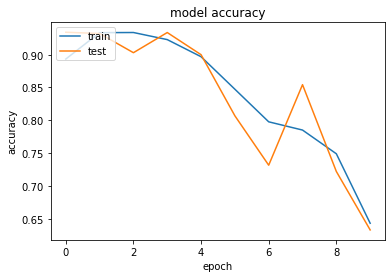

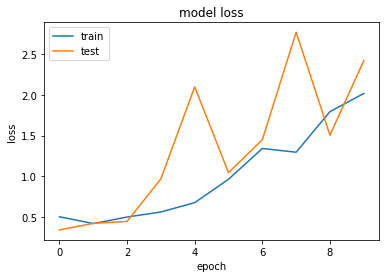

0.63294446
0.93416667


In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))